<a href="https://colab.research.google.com/github/JCMR-Andrade/Main/blob/main/Script%20CLUSTERS%20V_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Conheça o Colab</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Novidade&#41; Teste a API Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [1]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.7 MB/s eta 0:00:00


In [72]:
#%% Importando os pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px
import plotly.io as pio

In [73]:
dados = pd.read_excel('Planilha_Rex_Jun_Teste.xlsx')
dados

KPIs  2023-01-01 00:00:00  2023-02-01 00:00:00  \
0             TABACARIA ESPECIAL              5188.49              5289.00   
1            TABACARIA ORDINÁRIA             28554.50             27469.00   
2                      ALCOOLICO              7082.95              6632.10   
3                 NÃO ALCOOLICOS             14048.67             12482.60   
4                   FOOD SERVICE             22034.62             21098.07   
5                     BOMBONIERE              3627.90              4777.93   
6                       SORVETES              1167.50              1009.50   
7  SNACKS E BISCOITOS APERITIVOS              1075.12              1173.61   
8              OUTRAS CATEGORIAS              3217.60              3677.45   

   2023-03-01 00:00:00  2023-04-01 00:00:00  2023-05-01 00:00:00  \
0              5097.99              5639.00              7202.00   
1             31882.50             32068.00             33192.75   
2              7278.92              8574.08              7861.67   
3             15992.32             15009.38              9810.00   
4             25234.44             25880.28             27733.72   
5              5429.96              4896.63              2381.61   
6              1282.00              1088.50              1248.00   
7              1982.07              1300.26              1690.65   
8              3464.53              2881.76             11387.52   

   2023-06-01 00:00:00  2023-07-01 00:00:00  2023-08-01 00:00:00  \
0               632.50               546.00              8547.97   
1             38679.98             40724.48             35109.75   
2              7598.04              8218.85              8097.40   
3              9644.59             10931.04             12871.26   
4             28530.51             32671.03             33804.58   
5              5680.07              5320.90              5614.16   
6              1057.00              1015.50              1145.00   
7              1782.25              1828.50              1459.46   
8              8216.44              3970.08              3467.47   

   2023-09-01 00:00:00  2023-10-01 00:00:00  2023-11-01 00:00:00  \
0              8351.00              7830.00              5753.75   
1             34190.75             34790.00             32031.00   
2             10434.74             10186.47             11028.09   
3             14309.54             16331.20             16724.26   
4             33233.30             33278.78             33747.50   
5              4631.24              4770.66              4678.51   
6              1764.50              1774.51              1566.50   
7              1835.74              2120.00              2147.81   
8              3543.87              3549.18              4434.50   

   2023-12-01 00:00:00  2024-01-01 00:00:00  2024-02-01 00:00:00  \
0              7404.00              7903.00              7529.00   
1             36133.00             34836.00             33157.00   
2             14193.90             10812.01             10677.07   
3             21651.98             15432.52             13925.43   
4             31713.30             33511.03             32754.43   
5              5126.77              4558.05              4797.52   
6              1899.00              1424.90              1899.30   
7              2312.16              1945.71              1629.69   
8              5738.29              3540.23              3910.01   

   2024-03-01 00:00:00  2024-04-01 00:00:00  2024-05-01 00:00:00  \
0              5097.99              5639.00              8662.00   
1             31882.50             32068.00             33160.00   
2              7278.92              8574.08             12823.11   
3             15992.32             15009.38             14742.88   
4             25234.44             25880.28             41894.71   
5              5429.96              4896.63              6091.35   
6              1282.00              1088.50    

In [74]:
dados_t = dados.T
dados_t

0                    1          2  \
KPIs                 TABACARIA ESPECIAL  TABACARIA ORDINÁRIA  ALCOOLICO   
2023-01-01 00:00:00             5188.49              28554.5    7082.95   
2023-02-01 00:00:00              5289.0              27469.0     6632.1   
2023-03-01 00:00:00             5097.99              31882.5    7278.92   
2023-04-01 00:00:00              5639.0              32068.0    8574.08   
2023-05-01 00:00:00              7202.0             33192.75    7861.67   
2023-06-01 00:00:00               632.5             38679.98    7598.04   
2023-07-01 00:00:00               546.0             40724.48    8218.85   
2023-08-01 00:00:00             8547.97             35109.75     8097.4   
2023-09-01 00:00:00              8351.0             34190.75   10434.74   
2023-10-01 00:00:00              7830.0              34790.0   10186.47   
2023-11-01 00:00:00             5753.75              32031.0   11028.09   
2023-12-01 00:00:00              7404.0              36133.0    14193.9   
2024-01-01 00:00:00              7903.0              34836.0   10812.01   
2024-02-01 00:00:00              7529.0              33157.0   10677.07   
2024-03-01 00:00:00             5097.99              31882.5    7278.92   
2024-04-01 00:00:00              5639.0              32068.0    8574.08   
2024-05-01 00:00:00              8662.0              33160.0   12823.11   
2024-06-01 00:00:00              9116.5             33911.75   12025.63   

                                  3             4           5         6  \
KPIs                 NÃO ALCOOLICOS  FOOD SERVICE  BOMBONIERE  SORVETES   
2023-01-01 00:00:00        14048.67      22034.62      3627.9    1167.5   
2023-02-01 00:00:00         12482.6      21098.07     4777.93    1009.5   
2023-03-01 00:00:00        15992.32      25234.44     5429.96    1282.0   
2023-04-01 00:00:00        15009.38      25880.28     4896.63    1088.5   
2023-05-01 00:00:00          9810.0      27733.72     2381.61    1248.0   
2023-06-01 00:00:00         9644.59      28530.51     5680.07    1057.0   
2023-07-01 00:00:00        10931.04      32671.03      5320.9    1015.5   
2023-08-01 00:00:00        12871.26      33804.58     5614.16    1145.0   
2023-09-01 00:00:00        14309.54       33233.3     4631.24    1764.5   
2023-10-01 00:00:00         16331.2      33278.78     4770.66   1774.51   
2023-11-01 00:00:00        16724.26       33747.5     4678.51    1566.5   
2023-12-01 00:00:00        21651.98       31713.3     5126.77    1899.0   
2024-01-01 00:00:00        15432.52      33511.03     4558.05    1424.9   
2024-02-01 00:00:00        13925.43      32754.43     4797.52    1899.3   
2024-03-01 00:00:00        15992.32      25234.44     5429.96    1282.0   
2024-04-01 00:00:00        15009.38      25880.28     4896.63    1088.5   
2024-05-01 00:00:00        14742.88      41894.71     6091.35    1429.6   
2024-06-01 00:00:00        13286.53      38555.75     5200.22    1061.8   

                                                 7                  8  
KPIs                 SNACKS E BISCOITOS APERITIVOS  OUTRAS CATEGORIAS  
2023-01-01 00:00:00                        1075.12             3217.6  
2023-02-01 00:00:00                        1173.61            3677.45  
2023-03-01 00:00:00                        1982.07            3464.53  
2023-04-01 00:00:00                        1300.26            2881.76  
2023-05-01 00:00:00                        1690.65           11387.52  
2023-06-01 00:00:00                        1782.25            8216.44  
2023-07-01 00:00:00                         1828.5            3970.08  
2023-08-01 00:00:00                        1459.46            3467.47  
2023-09-01 00:00:00                        1835.74            3543.87  
2023-10-01 00:00:00                         2120.0            3549.18  
2023-11-01 00:00:00                        2147.81             4434.5  
2023-12-01 00:00:00                        2312.16            5738.29  
2024-01-01 00:00:00         

In [76]:
dados.columns = ['KPIs',
                 'Janeiro_23',
                 'Fevereiro_23',
                 'Março_23',
                 'Abril_23',
                 'Maio_23',
                 'Junho_23',
                 'Julho_23',
                 'Agosto_23',
                 'Setembro_23',
                 'Outubro_23',
                 'Novembro_23',
                 'Dezembro_23',
                 'Janeiro_24',
                 'Fevereiro_24',
                 'Março_24',
                 'Abril_24',
                 'Maio_24',
                 'Junho_24']


In [77]:
#%% Gráfico 3D das observações

fig = px.scatter_3d(dados,
                    x='Janeiro_23',
                    y='Junho_23',
                    z='Dezembro_23',
                    text=dados.index)
fig.show()

In [82]:
# Aplicando o procedimento de ZScore

dados_pad = dados.apply(zscore, ddof=1)
dados_pad

Janeiro_23  Fevereiro_23  Março_23  Abril_23   Maio_23  Junho_23  Julho_23  \
0   -0.442341     -0.430969 -0.520798 -0.460423 -0.365009 -0.803573 -0.757637   
1    1.924567      1.958205  1.904569  1.890381  1.900362  2.058889  1.973496   
2   -0.250438     -0.286293 -0.323312 -0.199354 -0.307511 -0.279528 -0.236075   
3    0.455169      0.343908  0.465696  0.373053 -0.137694 -0.125558 -0.051714   
4    1.264122      1.271944  1.302580  1.339997  1.424549  1.295305  1.426062   
5   -0.600424     -0.486020 -0.490738 -0.526455 -0.785157 -0.423824 -0.433063   
6   -0.849655     -0.891946 -0.866340 -0.865180 -0.883963 -0.771636 -0.725723   
7   -0.859013     -0.874268 -0.802948 -0.846345 -0.845381 -0.717072 -0.670459   
8   -0.641986     -0.604561 -0.668710 -0.705674 -0.000196 -0.233003 -0.524886   

   Agosto_23  Setembro_23  Outubro_23  Novembro_23  Dezembro_23  Janeiro_24  \
0  -0.280801    -0.324157   -0.380183    -0.535959    -0.511943   -0.366380   
1   1.741999     1.705837    1.708722     1.565079     1.711378    1.706841   
2  -0.315114    -0.160456   -0.197600    -0.114241     0.013523   -0.142453   
3   0.048437     0.143951    0.278503     0.341205     0.590700    0.213220   
4   1.642605     1.630619    1.591630     1.702324     1.369340    1.604849   
5  -0.504225    -0.616385   -0.617226    -0.621931    -0.688177   -0.623864   
6  -0.844571    -0.841598   -0.849373    -0.870757    -0.937972   -0.865045   
7  -0.820624    -0.836002   -0.822604    -0.824277    -0.905998   -0.824954   
8  -0.667705    -0.701810   -0.711868    -0.641442    -0.640851   -0.702213   

   Fevereiro_24  Março_24  Abril_24   Maio_24  Junho_24  
0     -0.380983 -0.520798 -0.460423 -0.369483 -0.301330  
1      1.685753  1.904569  1.890381  1.347933  1.504496  
2     -0.127111 -0.323312 -0.199354 -0.077771 -0.089459  
3      0.134849  0.465696  0.373053  0.056813  0.002371  
4      1.653288  1.302580  1.339997  1.960274  1.842716  
5     -0.601259 -0.490738 -0.526455 -0.549696 -0.586551  
6     -0.834982 -0.866340 -0.865180 -0.876505 -0.887950  
7     -0.856724 -0.802948 -0.846345 -0.822574 -0.805470  
8     -0.672831 -0.668710 -0.705674 -0.668992 -0.678823

In [83]:
# Visualizando o resultado do procedimento na média e desvio padrão
print(round(dados_pad.mean(), 2))
print(round(dados_pad.std(), 2))

Janeiro_23     -0.0
Fevereiro_23    0.0
Março_23       -0.0
Abril_23        0.0
Maio_23         0.0
Junho_23       -0.0
Julho_23       -0.0
Agosto_23      -0.0
Setembro_23     0.0
Outubro_23      0.0
Novembro_23    -0.0
Dezembro_23    -0.0
Janeiro_24      0.0
Fevereiro_24   -0.0
Março_24       -0.0
Abril_24        0.0
Maio_24         0.0
Junho_24        0.0
dtype: float64
Janeiro_23      1.0
Fevereiro_23    1.0
Março_23        1.0
Abril_23        1.0
Maio_23         1.0
Junho_23        1.0
Julho_23        1.0
Agosto_23       1.0
Setembro_23     1.0
Outubro_23      1.0
Novembro_23     1.0
Dezembro_23     1.0
Janeiro_24      1.0
Fevereiro_24    1.0
Março_24        1.0
Abril_24        1.0
Maio_24         1.0
Junho_24        1.0
dtype: float64


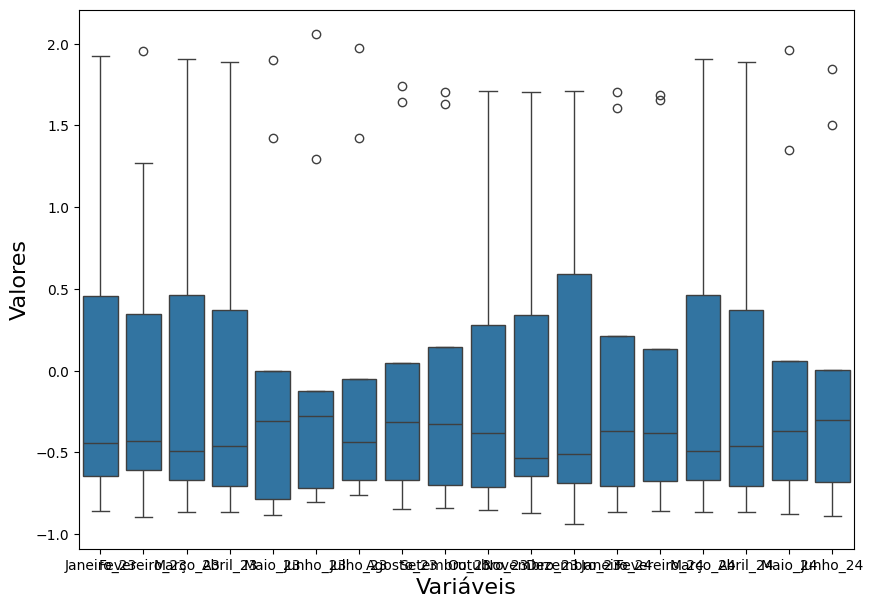

In [84]:
#%% Boxplot com as três variáveis originais

plt.figure(figsize=(10,7))
sns.boxplot(x='variable', y='value', data=pd.melt(dados_pad))
plt.ylabel('Valores', fontsize=16)
plt.xlabel('Variáveis', fontsize=16)
plt.show()

In [105]:
dist_eucl = pdist(dados_pad, metric='euclidean')
dist_eucl = pd.DataFrame(dist_eucl)
dist_eucl.sort_values(0, inplace=True)
dist_eucl

0
33   0.181554
32   0.940202
4    0.960850
31   1.127027
35   1.187942
1    1.257729
7    1.267713
30   1.268898
34   1.310123
17   1.678226
6    1.719495
5    1.836165
20   1.970273
10   2.003197
15   2.023778
19   2.683386
18   2.821708
2    3.061695
22   3.480043
25   3.798847
24   4.544313
23   4.678371
21   5.622877
9    6.723381
16   7.244377
3    8.326298
8    8.484443
26   8.813893
29   9.005019
0    9.572161
28   9.881327
11   9.984971
27  10.025603
14  10.151356
13  11.070859
12  11.212872

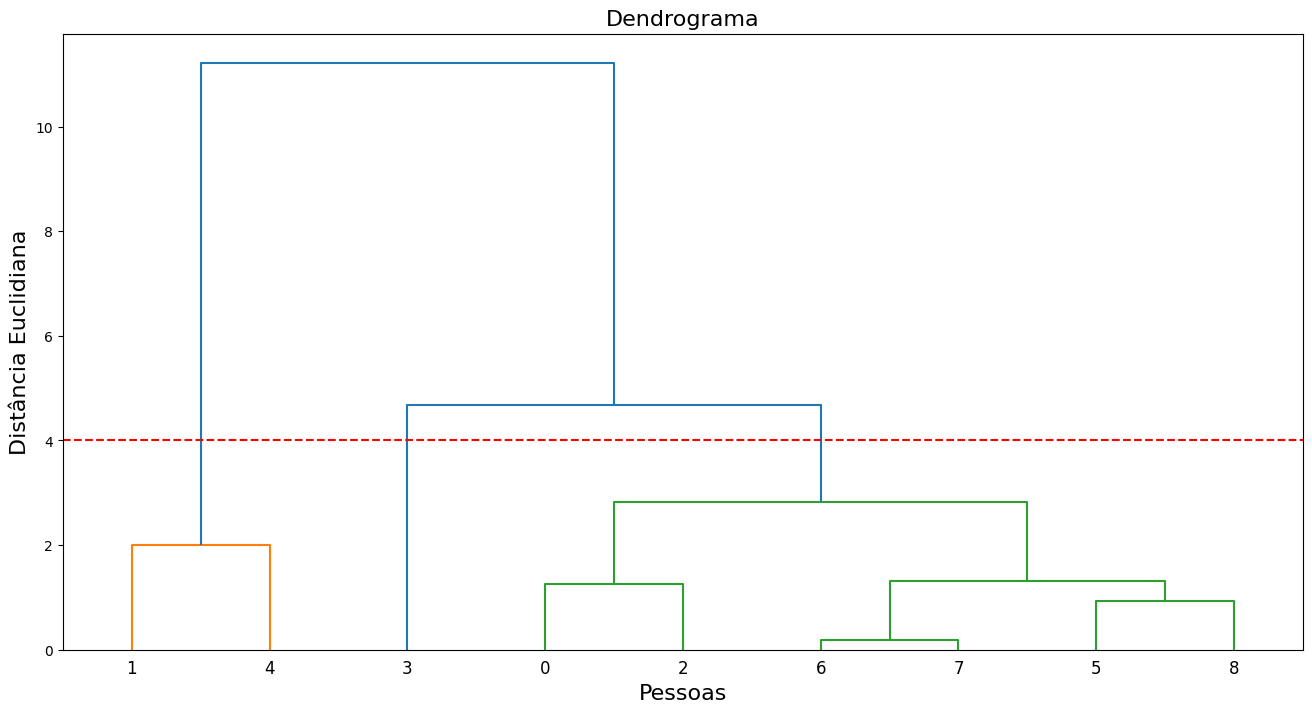

In [107]:
plt.figure(figsize=(16,8))
dend_sing = sch.linkage(dados_pad, method = 'complete', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 4.5, labels = list(dados.index))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 4, color = 'red', linestyle = '--')
plt.show()

In [117]:
# A medida de distância e o método de encadeamento são mantidos

cluster_comp = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(dados)
dados['cluster_complete'] = indica_cluster_comp
dados['cluster_complete'] = dados['cluster_complete'].astype('category')



In [118]:
# Coeficientes do esquema hierárquico de aglomeração (complete)
coef_complete = [y[1] for y in dendrogram_s['dcoord']]
print(coef_complete)


[2.0031966300383157, 1.2577286931779508, 0.18155448383263556, 0.9402024868551114, 1.3101226509121782, 2.8217082591664244, 4.678370888222949, 11.21287246576493]


In [119]:
#%% Cluster Não Hierárquico K-means

# Considerando que identificamos 3 possíveis clusters na análise hierárquica

kmeans = KMeans(n_clusters=4, init='random', random_state=100).fit(dados)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans.labels_
dados['cluster_kmeans'] = kmeans_clusters
dados['cluster_kmeans'] = dados['cluster_kmeans'].astype('category')
dados.columns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Index(['Janeiro_23', 'Fevereiro_23', 'Março_23', 'Abril_23', 'Maio_23',
       'Junho_23', 'Julho_23', 'Agosto_23', 'Setembro_23', 'Outubro_23',
       'Novembro_23', 'Dezembro_23', 'Janeiro_24', 'Fevereiro_24', 'Março_24',
       'Abril_24', 'Maio_24', 'Junho_24', 'cluster_complete',
       'cluster_kmeans'],
      dtype='object')

In [120]:
dados_press = dados.reset_index()
d = dados_press.T
d.columns = ['TABACARIA ESPECIAL',
             'TABACARIA ORDINÁRIA',
             'ALCOOLICO',
             'NÃO ALCOOLICOS',
             'FOOD SERVICE',
             'BOMBONIERE',
             'SORVETES',
             'SNACKS E BISCOITOS APERITIVOS',
             'OUTRAS CATEGORIAS']
d2 = d.T
d2.drop(columns='index', inplace=True)
d2 = d2.to_excel('Planilha_Rex_Jun_Teste_Clusters.xlsx')

In [122]:
#%% Identificando as coordenadas centroides dos clusters finais

cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = dados.columns
cent_finais.index.name = 'cluster'
cent_finais

Janeiro_23  Fevereiro_23   Março_23    Abril_23    Maio_23  \
cluster                                                               
0           2272.03     2659.6225   3039.640   2541.7875   4176.945   
1          25294.56    24283.5350  28558.470  28974.1400  30463.235   
2          14048.67    12482.6000  15992.320  15009.3800   9810.000   
3           6135.72     5960.5500   6188.455   7106.5400   7531.835   

          Junho_23   Julho_23   Agosto_23  Setembro_23  Outubro_23  \
cluster                                                              
0         4183.940   3033.745   2921.5225    2943.8375   3053.5875   
1        33605.245  36697.755  34457.1650   33712.0250  34034.3900   
2         9644.590  10931.040  12871.2600   14309.5400  16331.2000   
3         4115.270   4382.425   8322.6850    9392.8700   9008.2350   

         Novembro_23  Dezembro_23  Janeiro_24  Fevereiro_24   Março_24  \
cluster                                                                  
0            3206.83     3769.055   2867.2225      3059.130   3039.640   
1           32889.25    33923.150  34173.5150     32955.715  28558.470   
2           16724.26    21651.980  15432.5200     13925.430  15992.320   
3            8390.92    10798.950   9357.5050      9103.035   6188.455   

           Abril_24     Maio_24   Junho_24  cluster_complete  cluster_kmeans  
cluster                                                                       
0         2541.7875   3527.3775   3097.395               3.0             1.0  
1        28974.1400  37527.3550  36233.750               0.0             0.0  
2        15009.3800  14742.8800  13286.530               2.0             2.0  
3         7106.5400  10742.5550  10571.065               1.0             1.5

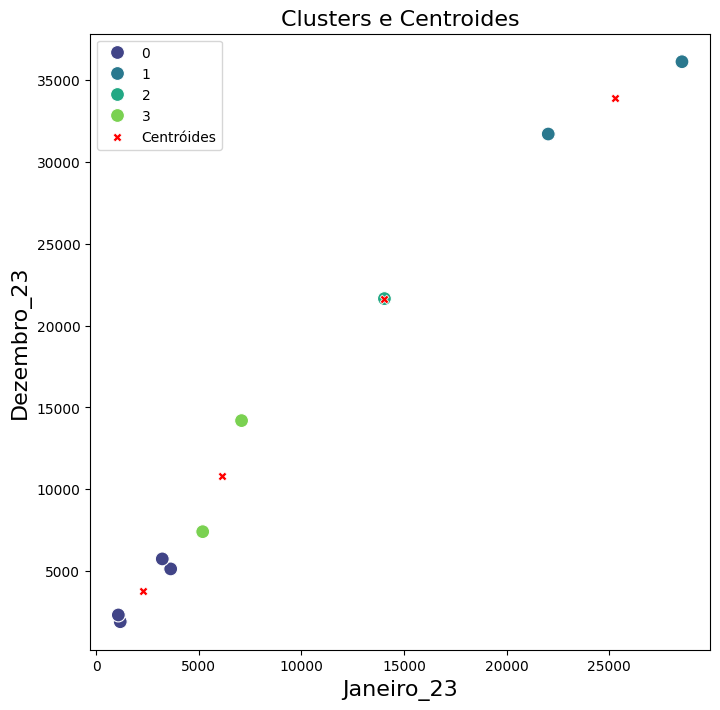

In [123]:
#%% Plotando as observações e seus centroides dos clusters

plt.figure(figsize=(8,8))
sns.scatterplot(data=dados, x='Janeiro_23', y='Dezembro_23', hue='cluster_kmeans', palette='viridis', s=100)
sns.scatterplot(data=cent_finais, x='Janeiro_23', y='Dezembro_23', c = 'red', label = 'Centróides', marker="X", s = 40)
plt.title('Clusters e Centroides', fontsize=16)
plt.xlabel('Janeiro_23', fontsize=16)
plt.ylabel('Dezembro_23', fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



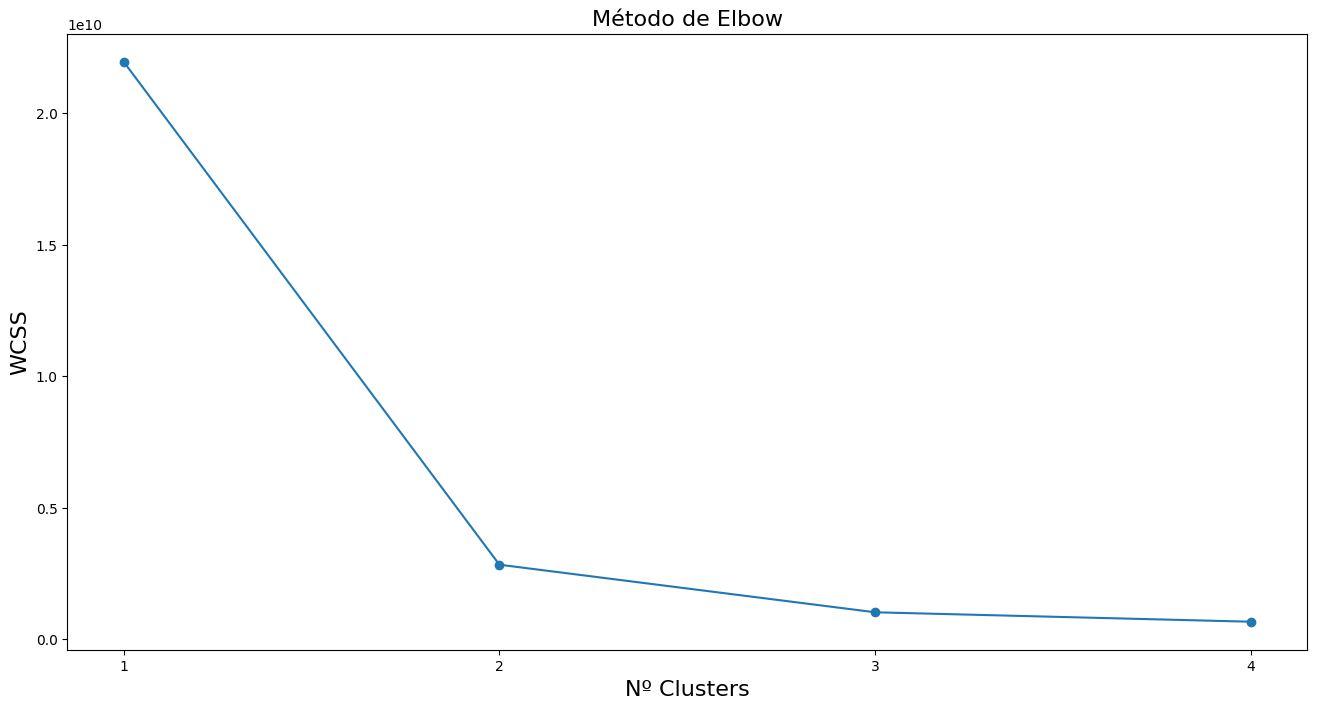

In [124]:
#%% Identificação da quantidade de clusters

# Método Elbow para identificação do nº de clusters
## Elaborado com base na "WCSS": distância de cada observação para o centroide de seu cluster
## Quanto mais próximos entre si e do centroide, menores as distâncias internas
## Normalmente, busca-se o "cotovelo", ou seja, o ponto onde a curva "dobra"

elbow = []
K = range(1,5) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(dados)
    elbow.append(kmeanElbow.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,5))
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()


In [125]:
# Matemática
pg.anova(dv='Janeiro_23',
         between='cluster_kmeans',
         data=dados,
         detailed=True).T

# Física
pg.anova(dv='Julho_23',
         between='cluster_kmeans',
         data=dados,
         detailed=True).T

# Química
pg.anova(dv='Dezembro_23',
         between='cluster_kmeans',
         data=dados,
         detailed=True).T

0              1
Source     cluster_kmeans         Within
SS      1291595691.924722  44159170.3005
DF                      3              5
MS       430531897.308241   8831834.0601
F               48.747734            NaN
p-unc              0.0004            NaN
np2              0.966941            NaN

In [126]:
#%% Gráfico 3D dos clusters

fig = px.scatter_3d(dados,
                    x='Janeiro_23',
                    y='Julho_23',
                    z='Dezembro_23',
                    color='cluster_kmeans',
                    text=dados.index)
fig.show()